In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
# dowload dataset
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/kaggle dataset/kaggle1/test.csv')
train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/kaggle dataset/kaggle1/train.csv")
submit=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/kaggle dataset/kaggle1/submit.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
# load the data
data = train
data.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [5]:
print("Shape of dataset ", data.shape)
print("Columns ", data.columns)

Shape of dataset  (20800, 5)
Columns  Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [6]:
# Let's do some statistics of the text columns
txt_len = data.text.str.split().str.len()
txt_len.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [7]:
# Let's do some statistics of the title columns
title_len = data.title.str.split().str.len()
title_len.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

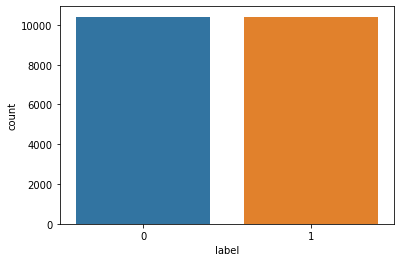

In [8]:
# Class Distribution
# 1: Unreliable
# 2: Reliable
sns.countplot(x='label', data= data)

In [9]:
print(data.label.value_counts())
print()
print(round(data.label.value_counts(normalize=True),2)*100)

1    10413
0    10387
Name: label, dtype: int64

1    50.0
0    50.0
Name: label, dtype: float64


In [10]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [12]:
# cleaning
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# remove unused columns
def remove_unused_c(df, column_n=remove_c):
    df = df.drop(column_n, axis=1)
    return df

# impute null values with none
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(),col] = "None"
    return feature_df

# clean_data
def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)    
    #impute null value
    df = null_process(df)
    
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [13]:
df = clean_dataset(data)
df['text'] = df.text.apply(nltk_preprocess)
df['title'] = df.title.apply(nltk_preprocess)

In [14]:
df.head()

title  \
0  house dem aide didnt even see comeys letter ja...   
1   flynn hillary clinton big woman campus breitbart   
2                              truth might get fired   
3   15 civilian killed single u airstrike identified   
4  iranian woman jailed fictional unpublished sto...   

                                                text  label  
0  house dem aide didnt even see comeys letter ja...      1  
1  ever get feeling life circle roundabout rather...      0  
2  truth might get fired october 29 2016 tension ...      1  
3  video 15 civilian killed single u airstrike id...      1  
4  print iranian woman sentenced six year prison ...      1

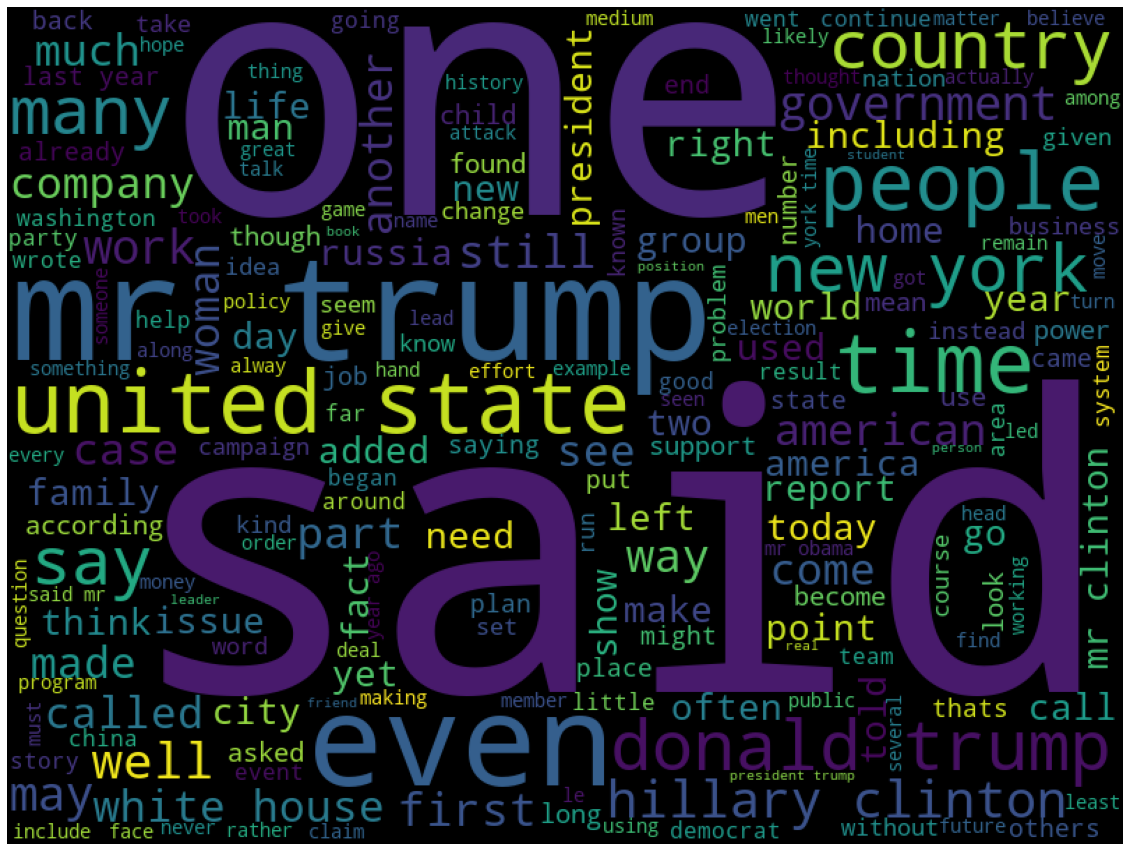

In [15]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

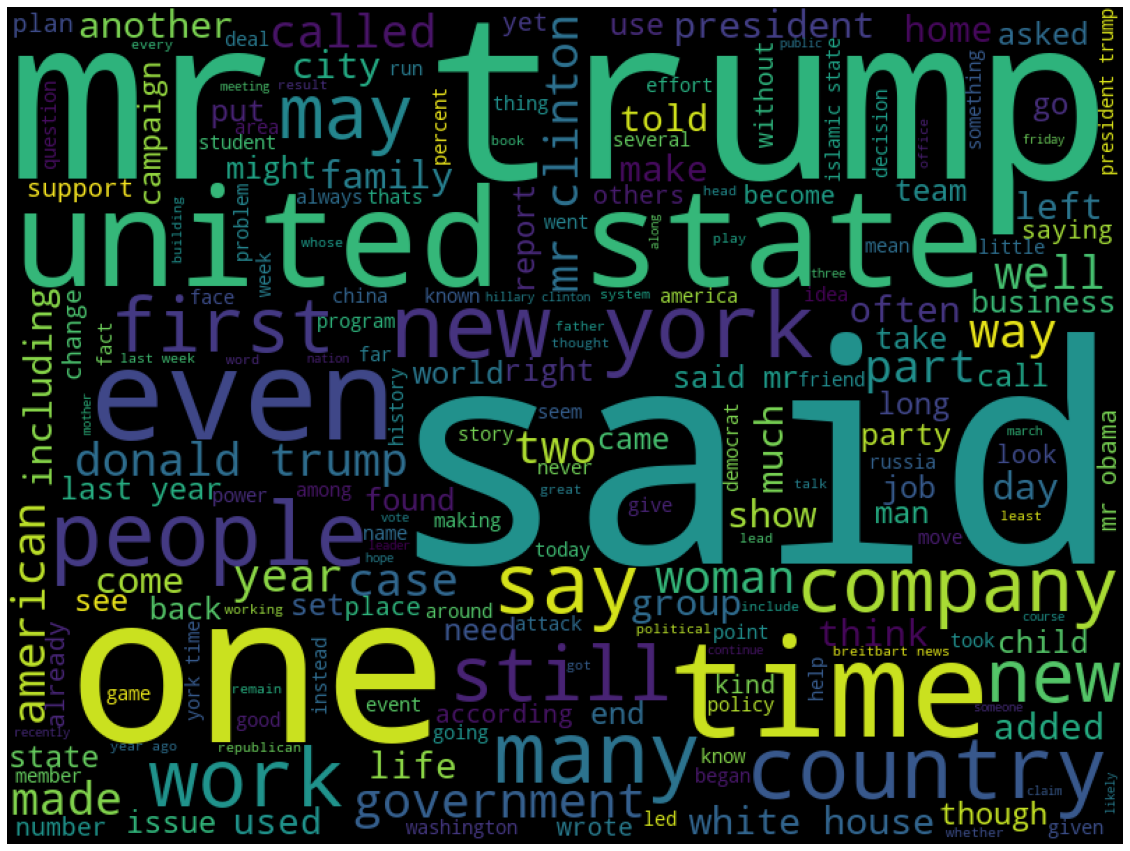

In [16]:
# reliable news (0)
reliable_news = " ".join(df[df['label']==0]['text'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

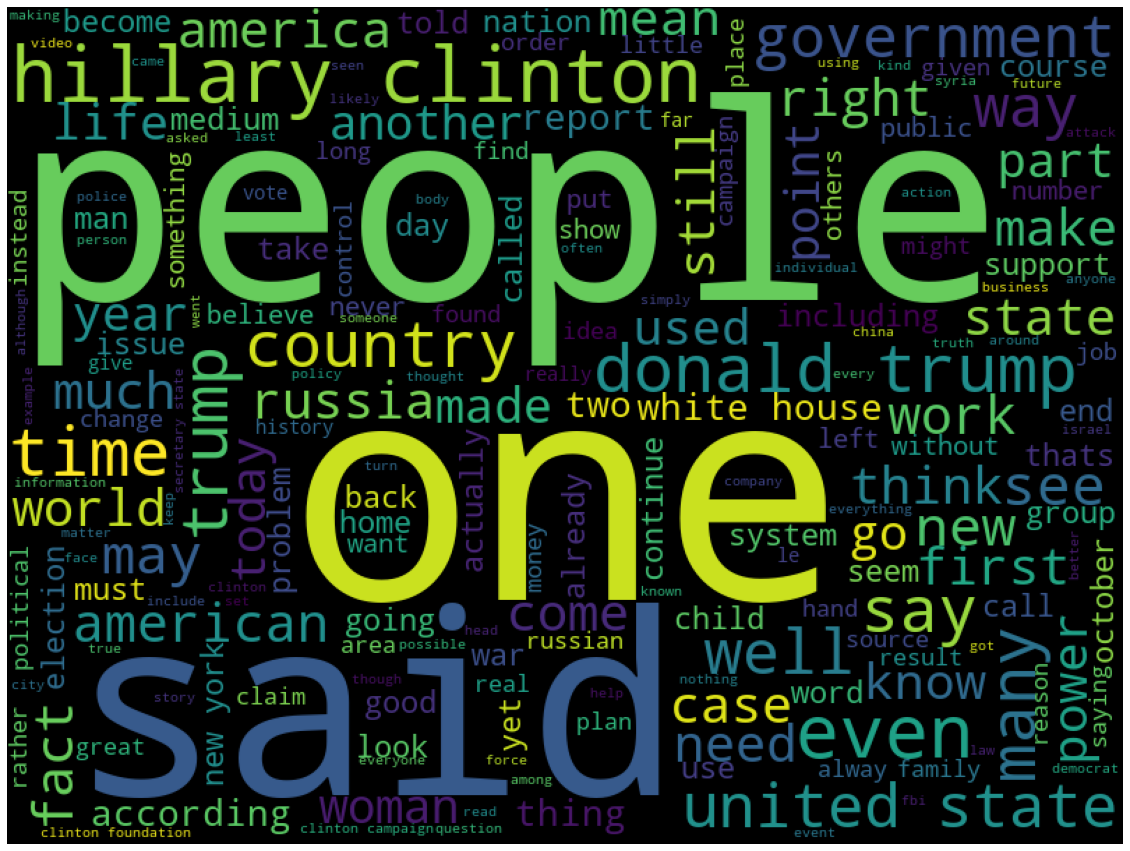

In [17]:
# unreliable news (1)
unreliable_news  = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(unreliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

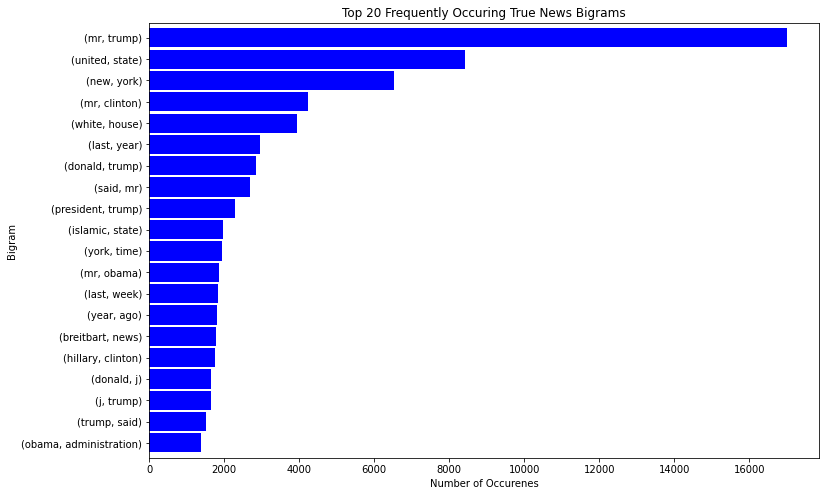

In [18]:
# Bigram 

def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurenes", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=2)

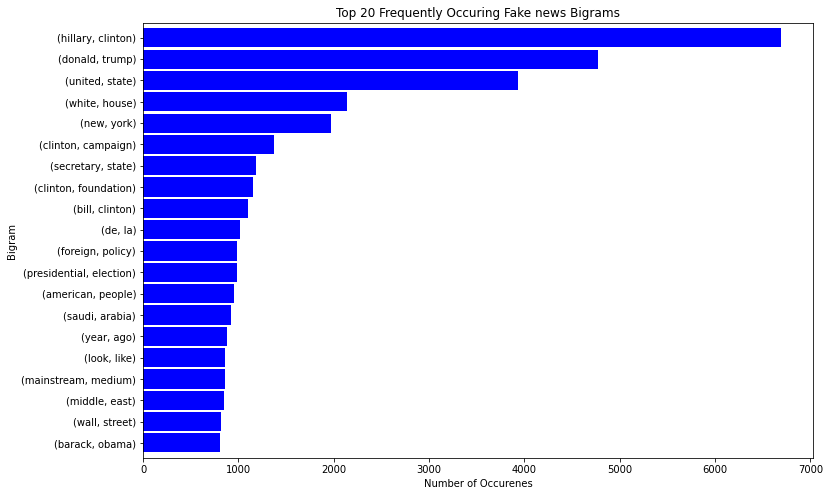

In [19]:
plot_top_ngrams(unreliable_news, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

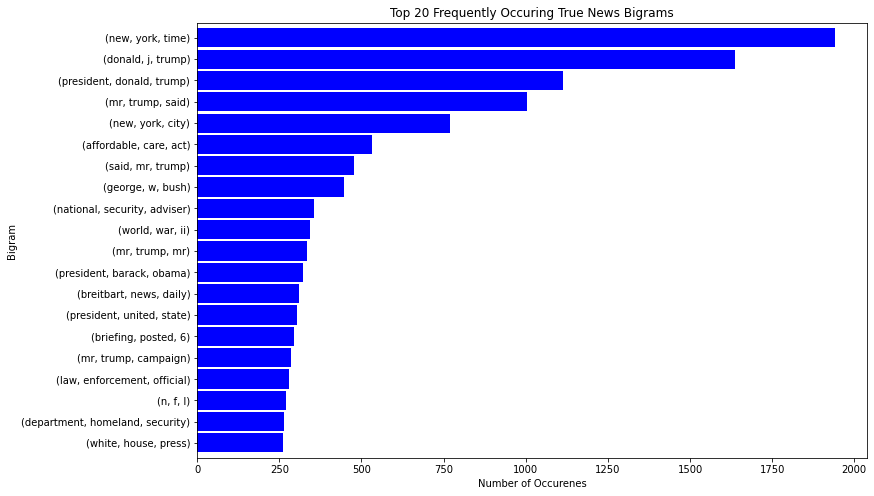

In [20]:
# Trigram
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

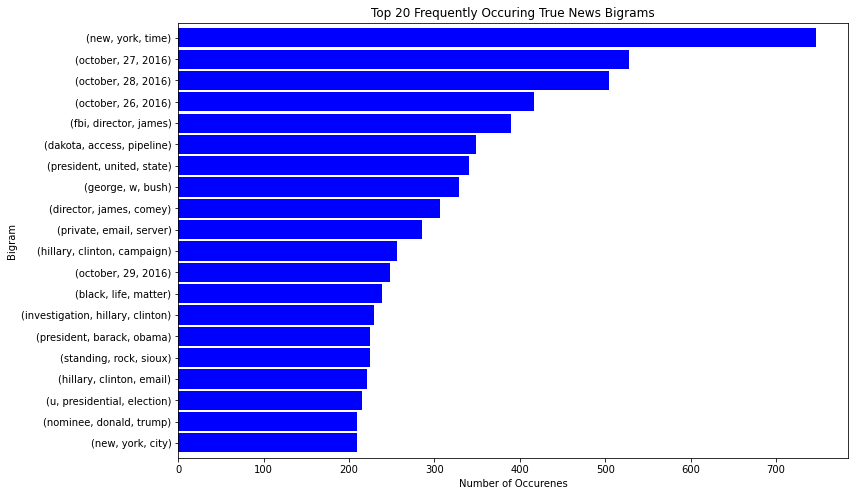

In [21]:
plot_top_ngrams(unreliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

In [22]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 45.2 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 6.6 MB 38.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [23]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import random

In [24]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(123)

In [25]:
model_name = "bert-base-uncased"
max_length= 512

In [26]:
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
data.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [28]:
## Data Preparation
data = data[data['text'].notna()]
data = data[data['title'].notna()]
data = data[data['author'].notna()]

In [29]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
    texts = []
    labels = []
    
    for i in range(len(df)):
        text = df['text'].iloc[i]
        label = df['label'].iloc[i]
        
        if include_title:
            text = df['title'].iloc[i] + " - " + text
        if include_author:
            text = df['author'].iloc[i] + " - " + text
        
        if text and label in [0,1]:
            texts.append(text)
            labels.append(label)
            
    return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(data)

In [30]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

14628 14628
3657 3657


In [31]:
# tokenizing the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [32]:
# converting the encoding into a PyTorch datset
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item
    
    def __len__(self):
        return len(self.labels)
    
# convert tokenize data into torch dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [33]:
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def computer_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision,recall,f1,_ =precision_recall_fscore_support(labels,preds,average='binary')
    acc = accuracy_score(labels, preds)
    
    return {
        'accuracy':acc,
        'f1':f1,
        'precision':precision,
        'recall':recall
        }

In [40]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

using `logging_steps` to initialize `eval_steps` to 200
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [41]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=computer_metrics,
)

In [42]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 14628
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1463


***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin
****

TrainOutput(global_step=1463, training_loss=0.025957299924760507, metrics={'train_runtime': 4437.6598, 'train_samples_per_second': 3.296, 'train_steps_per_second': 0.33, 'total_flos': 3848788517806080.0, 'train_loss': 0.025957299924760507, 'epoch': 1.0})

In [43]:
# evaluate the current model after training
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20


{'epoch': 1.0,
 'eval_accuracy': 0.9989062072737216,
 'eval_f1': 0.9987546699875467,
 'eval_loss': 0.005110885016620159,
 'eval_precision': 0.9975124378109452,
 'eval_recall': 1.0,
 'eval_runtime': 241.0123,
 'eval_samples_per_second': 15.174,
 'eval_steps_per_second': 0.759}

In [44]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [45]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
        return d[int(probs.argmax())]
    else:
        return int(probs.argmax())

In [46]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

get_prediction(real_news, convert_to_label=True)

'fake'

In [ ]:
# read the test set
test_df = test
# make a copy of the testing set
new_df = test_df.copy()
# add a new column that contains the author, title and article content
new_df["new_text"] = new_df["author"].astype(str) + " : " + new_df["title"].astype(str) + " - " + new_df["text"].astype(str)
# get the prediction of all the test set
new_df["label"] = new_df["new_text"].apply(get_prediction)
# make the submission file
final_df = new_df[["id", "label"]]
final_df.to_csv("submit_final.csv", index=False)